In [ ]:
!pip install tensorflow


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2883 - accuracy: 0.9172 - val_loss: 0.1578 - val_accuracy: 0.9558
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1295 - accuracy: 0.9624 - val_loss: 0.1260 - val_accuracy: 0.9635
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0884 - accuracy: 0.9738 - val_loss: 0.1055 - val_accuracy: 0.9683
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0659 - accuracy: 0.9795 - val_loss: 0.0923 - val_accuracy: 0.9726
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0833 - accuracy: 0.9744
Test accuracy: 97.44%
313/313 [==============================] - 1s 2ms/step


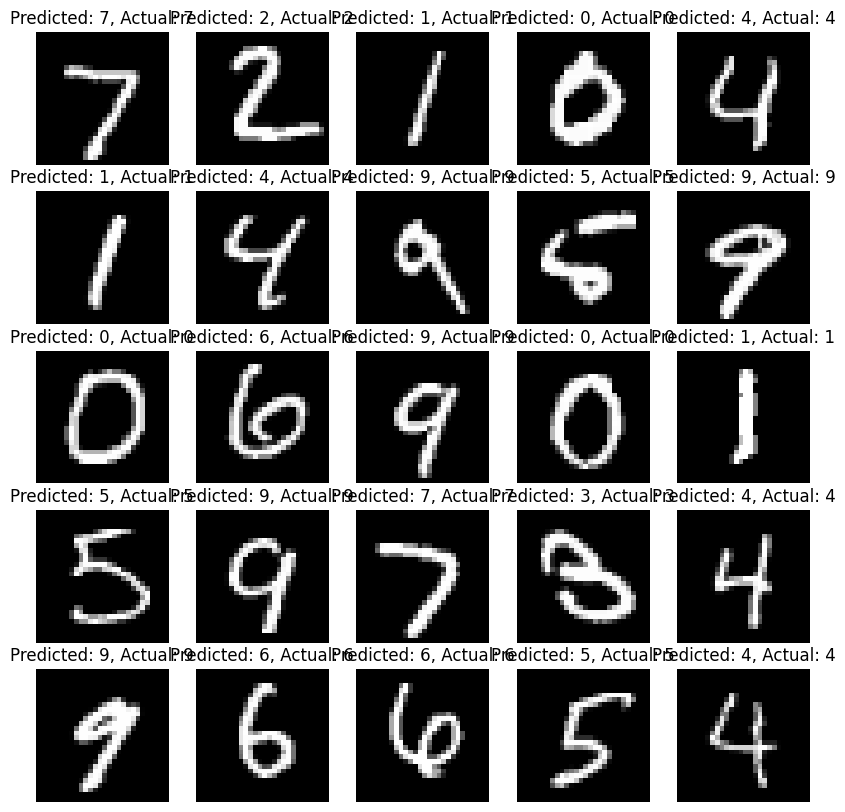

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build a neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a 1D array
    Dense(128, activation='relu'),   # Fully connected layer with 128 units and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 units (one for each digit) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Make predictions
predictions = model.predict(x_test)

# Visualize some predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Predicted: {tf.argmax(predictions[i])}, Actual: {tf.argmax(y_test[i])}')
    plt.axis('off')
plt.show()
